In [15]:
#TRUE
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

file_path = 'TRADEDATABTC.gz'
data = pd.read_csv(file_path)

data['timestamp'] = pd.to_datetime(data['timestamp'], unit='us') + pd.Timedelta(hours=3)
data.set_index('timestamp', inplace=True)

data['price x volume'] = data['price'] * data['amount']

agg_funcs = {
    'amount': 'sum',
    'side': 'first',
    'price': ['first', 'last'],
    'price x volume': 'sum'
}

grouped = data.groupby('timestamp').agg(agg_funcs)

grouped['vwap'] = grouped[('price x volume', 'sum')] / grouped[('amount', 'sum')]

grouped['order_type'] = (grouped[('price', 'last')] != grouped[('price', 'first')]).replace({True: 'MO_1', False: 'MO_0'})

grouped.columns = [' '.join(col).strip() for col in grouped.columns.values]

grouped.rename(columns={
    'amount sum': 'total_amount',
    'side first': 'side',
    'price first': 'open_price',
    'price last': 'close_price', 
    'price x volume sum': 'total_price_x_volume'
}, inplace=True)

grouped['side'] = grouped['side'].replace({'buy': 1, 'sell': -1})

grouped = grouped[['side', 'total_amount', 'vwap', 'order_type']]

grouped


,side,total_amount,vwap,order_type
timestamp,,,,
2023-10-02 03:00:00.632,1,28000,28004.804464,MO_1
2023-10-02 03:00:00.662,1,10650,28005.000000,MO_0
2023-10-02 03:00:00.670,1,17370,28005.000000,MO_0
2023-10-02 03:00:07.373,1,50,28005.000000,MO_0
2023-10-02 03:00:08.503,1,166680,28007.914297,MO_1
...,...,...,...,...
2023-10-03 02:59:40.587,-1,130,27512.500000,MO_0
2023-10-03 02:59:46.430,1,770,27513.000000,MO_0
2023-10-03 02:59:46.434,1,2010,27513.000000,MO_0


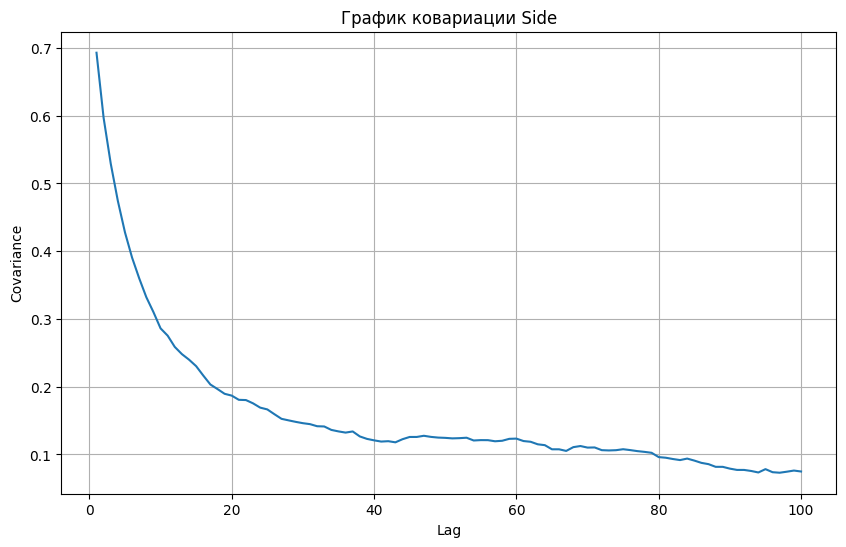

In [16]:
lags = []
covs = []

for i in range(1, 101):
    lags.append(i)
    covs.append(grouped['side'].shift(i).cov(grouped['side']))

cov_df = pd.DataFrame(covs, lags)

plt.figure(figsize=(10, 6))
plt.plot(cov_df)
plt.title('График ковариации Side')
plt.xlabel('Lag')
plt.ylabel('Covariance')
plt.grid(True)
plt.show()


In [17]:
#TRUE
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

file_path2 = 'TRADEDATABTC1.gz'
data = pd.read_csv(file_path)

data['timestamp'] = pd.to_datetime(data['timestamp'], unit='us') + pd.Timedelta(hours=3)
data.set_index('timestamp', inplace=True)

data['price x volume'] = data['price'] * data['amount']

agg_funcs = {
    'amount': 'sum',
    'side': 'first',
    'price': ['first', 'last'],
    'price x volume': 'sum'
}

grouped = data.groupby('timestamp').agg(agg_funcs)

grouped['vwap'] = grouped[('price x volume', 'sum')] / grouped[('amount', 'sum')]

grouped['order_type'] = (grouped[('price', 'last')] != grouped[('price', 'first')]).replace({True: 'MO_1', False: 'MO_0'})

grouped.columns = [' '.join(col).strip() for col in grouped.columns.values]

grouped.rename(columns={
    'amount sum': 'total_amount',
    'side first': 'side',
    'price first': 'open_price',
    'price last': 'close_price', 
    'price x volume sum': 'total_price_x_volume'
}, inplace=True)

grouped['side'] = grouped['side'].replace({'buy': 1, 'sell': -1})

grouped = grouped[['side', 'total_amount', 'vwap', 'order_type']]

grouped


,side,total_amount,vwap,order_type
timestamp,,,,
2023-10-02 03:00:00.632,1,28000,28004.804464,MO_1
2023-10-02 03:00:00.662,1,10650,28005.000000,MO_0
2023-10-02 03:00:00.670,1,17370,28005.000000,MO_0
2023-10-02 03:00:07.373,1,50,28005.000000,MO_0
2023-10-02 03:00:08.503,1,166680,28007.914297,MO_1
...,...,...,...,...
2023-10-03 02:59:40.587,-1,130,27512.500000,MO_0
2023-10-03 02:59:46.430,1,770,27513.000000,MO_0
2023-10-03 02:59:46.434,1,2010,27513.000000,MO_0


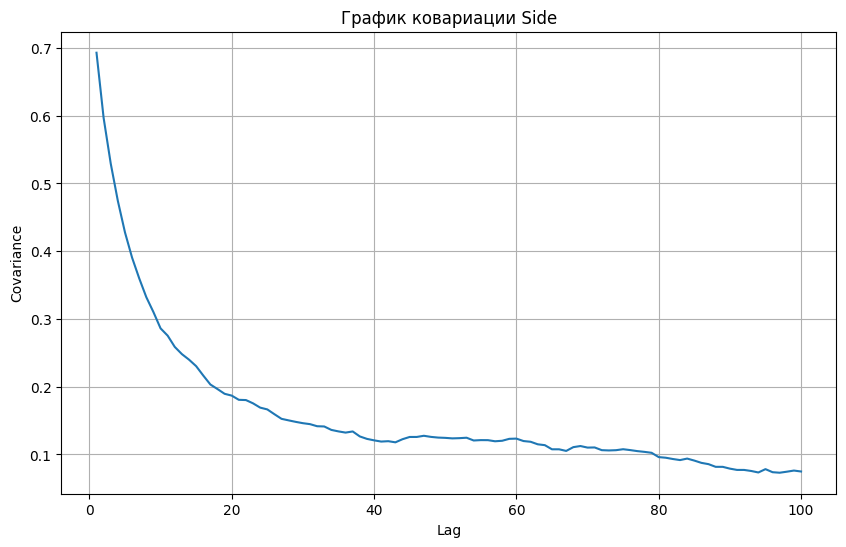

In [18]:
lags = []
covs = []

for i in range(1, 101):
    lags.append(i)
    covs.append(grouped['side'].shift(i).cov(grouped['side']))

cov_df = pd.DataFrame(covs, lags)

plt.figure(figsize=(10, 6))
plt.plot(cov_df)
plt.title('График ковариации Side')
plt.xlabel('Lag')
plt.ylabel('Covariance')
plt.grid(True)
plt.show()


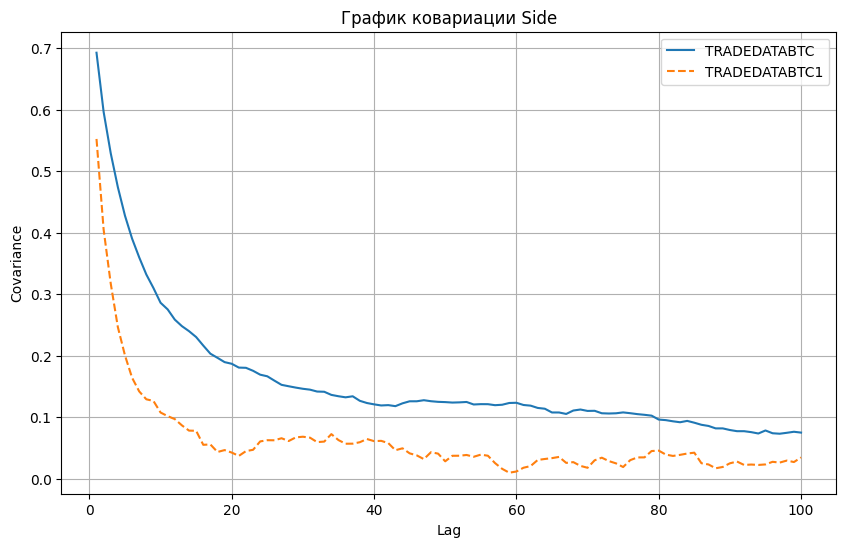

In [19]:
data2 = pd.read_csv(file_path2)

data2['timestamp'] = pd.to_datetime(data2['timestamp'], unit='us') + pd.Timedelta(hours=3)
data2.set_index('timestamp', inplace=True)
data2['price x volume'] = data2['price'] * data2['amount']
grouped2 = data2.groupby(data2.index).agg(agg_funcs)
grouped2['vwap'] = grouped2[('price x volume', 'sum')] / grouped2[('amount', 'sum')]
grouped2['order_type'] = (grouped2[('price', 'last')] != grouped2[('price', 'first')]).replace({True: 'MO_1', False: 'MO_0'})
grouped2.columns = [' '.join(col).strip() for col in grouped2.columns.values]
grouped2.rename(columns={
    'amount sum': 'total_amount',
    'side first': 'side',
    'price first': 'open_price',
    'price last': 'close_price', 
    'price x volume sum': 'total_price_x_volume'
}, inplace=True)
grouped2['side'] = grouped2['side'].replace({'buy': 1, 'sell': -1})

lags2 = []
covs2 = []
for i in range(1, 101):
    lags2.append(i)
    covs2.append(grouped2['side'].shift(i).cov(grouped2['side']))

cov_df2 = pd.DataFrame(covs2, lags2)

plt.figure(figsize=(10, 6))
plt.plot(cov_df, label='TRADEDATABTC')
plt.plot(cov_df2, label='TRADEDATABTC1', linestyle='--')
plt.title('График ковариации Side')
plt.xlabel('Lag')
plt.ylabel('Covariance')
plt.legend()
plt.grid(True)
plt.show()